# Cavitation Spectrum
## For Sanjiv's paper

In [1]:
# Import modules
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the struct into array 'A'
mat = scipy.io.loadmat('SG_paper_freq_data_v3.mat');
A=mat['combined_data']

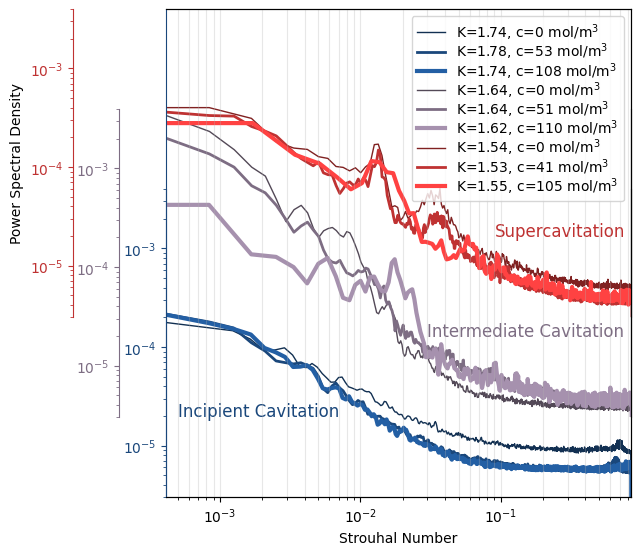

In [3]:
# Create the figure

fig=plt.figure(figsize=(6,4)) # 6"x4" printable area 
ax1=fig.add_subplot(111) # Start with one set of axes covering the whole plot area 

y0_1 = 0.2 # vert-offset (%plot area) of second set of data
y0_2 = 0.45 # vert-offset (%plot area) of third set of data
ymin = 3e-6 # each dataset's y values min
ymax = 4e-3 # each dataset's y values max

# Create first Y axis
ax1.spines['top'].set_visible(False)
plt.ylim(ymin,ymax)
plt.xlim(A[0,0][1][0,1],A[0,0][1][0,-1])
ax1.get_xaxis().set_visible(False)

# Create second Y axis
ax2=plt.axes([0.125, 0.11+y0_1, 0.775, 0.77]) # vertical offset
ax2.patch.set_alpha(0)
plt.ylim(ymin,ymax)
plt.xlim(A[0,0][1][0,1],A[0,0][1][0,-1])
ax2.get_xaxis().set_visible(False)
ax2.spines['left'].set_position(('axes',-0.1)) # horizontal offset
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
             
# Create third Y axis
ax3=plt.axes([0.125, 0.11+y0_2, 0.775, 0.77])# vertical offset
ax3.patch.set_alpha(0)
plt.ylim(ymin,ymax)
plt.xlim(A[0,0][1][0,1],A[0,0][1][0,-1])
ax3.get_xaxis().set_visible(False)
ax3.spines['left'].set_position(('axes',-0.2)) #horizonal offset
ax3.spines['bottom'].set_visible(False)
plt.ylabel('Power Spectral Density');

# Create dummy 4th axis to eliminate gaps in the axes box.
ax4=plt.axes([0.125, 0.11, 0.775, 0.77+y0_2]) # dummy axes for grid and box
ax4.patch.set_alpha(0)
ax4.get_yaxis().set_visible(False)
plt.xlim(A[0,0][1][0,1],A[0,0][1][0,-1])
ax4.set_xscale('log')
plt.grid(which='both',axis='x',alpha=.3)
plt.xlabel('Strouhal Number');

# Create colours using predefined colormap
#cm=plt.cm.brg; cList=[cm(j) for j in np.linspace(0,1,9)] 

# Set colours using Sanjiv's values
red=np.array((255,66,66))/255; 
grey=np.array((166,145,174))/255;
blue=np.array((35,95,164))/255;
cList=[blue*0.5,blue*0.75,blue,grey*0.5,grey*0.75,grey,red*0.5,red*0.75,red]

# Line thicknesses and which axes to use for each entry in the struct in A
lList=[1,2,3,1,2,3,1,2,3]
curr_ax=[ax1,ax1,ax1,ax2,ax2,ax2,ax3,ax3,ax3]

# Text labels
ax1.text(5e-4, 2e-5, 'Incipient Cavitation',    c=cList[1], fontsize=12)
ax2.text(3e-2, 2e-5, 'Intermediate Cavitation', c=cList[4], fontsize=12)
ax3.text(9e-2, 2e-5, 'Supercavitation',         c=cList[7], fontsize=12)

# Set colour of Y axes
ax1.spines['left'].set_color(cList[1])
ax2.spines['left'].set_color(cList[4])
ax3.spines['left'].set_color(cList[7])
ax4.spines['left'].set_color(cList[1])

ax1.tick_params(axis='y', colors=cList[1], which='both')
ax2.tick_params(axis='y', colors=cList[4], which='both')
ax3.tick_params(axis='y', colors=cList[7], which='both')

# Finally, draw the data on the axes
legendList=[]
for i in range(A.shape[1]):
    psd,freq,K,CO2=A[0,i];
    ph,=curr_ax[i].loglog(freq[0,:],psd,c=cList[i],lw=lList[i],label=r'K=%.2f, c=%.0f mol/m$^3$' % (K[0,0],CO2[0,0]));
    legendList.append(ph)

# Make the legend, vertically squeezing the text together a little tighter than the default
plt.legend(legendList,[l.get_label() for l in legendList],labelspacing=-0.1);

# Save figure.
plt.savefig('/Users/dduke/Desktop/sanjiv-spectrum.pdf',bbox_inches='tight');